## Alireza Ansari - ML Practical Homework 02
### Student ID: 400123114

***

First, we need to import necessary libraries

In [8]:
from matplotlib.cbook import index_of
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In the following section, first, we define a 1-Dimensional Gaussian PDF called gaussian_pdf that takes the input feature, mu as a mean and sigma. Then, by defining a class called "NaiveBayesClassifier", we use means, variances, calss names and prior probabilities as input respectively. 

In the function "Predict", after taking the input feature x, a predicted class (as a number or string) will return. Also in the function "ClassificationAccuracy", prediction accuracy will return as a function of test datas.

In [9]:
# 1-D gaussian pdf
def gaussian_pdf(x, mu, sigma):
  if sigma == 0:
    y = mu
  else: 
    y = ((np.pi*2*sigma)**(-1/2)) * np.exp(-0.5* ((x-mu)**2)/sigma)
  return y

class NaiveBayesClassifier:

  def __init__(self, mus, sigmas, class_names, priors):
    self.mus = mus
    self.priors = priors
    self.sigmas = sigmas
    self.class_names = class_names

  def predict(self, x, output_type):
    z = list(self.priors)
    for i in range(len(self.class_names)):
      for j in range(len(self.mus)):
        z[i]=z[i]*gaussian_pdf(x[j],self.mus[j,i],self.sigmas[j,i])
    if output_type=='name' :
      return self.class_names[z.index(np.max(z))] 
    elif output_type=='num':
      return  z.index(np.max(z))
  
  def ClassificationAccuracy(self,testdata,testOutput):
    y=[]
    for i in range(len(testdata)):
      y.append(self.predict(testdata[i,:],'num'))
    error=y-testOutput
    return np.sum(error==0)/len(testOutput)

In the following section, first we read attached dataset called "diabetes_prediction_dataset.csv". Then, we assign numbers as mentioned below:

    @ gender: male   --> -1
              female --> +1
              other  -->  0

    @ smoking_history: never       --> +3
                       No Info     -->  0
                       current     --> -1
                       former      --> +1
                       ever        --> -2
                       not current --> +2
                       
Then, by usinn "df = df.fillna(df.mean())", we replace null values by mean value. After that, we print feature names and data head.

In [18]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df = df.replace({'gender' : { 'Male':-1 , 'Female':1, 'Other':0}})
df = df.replace({'smoking_history' : { 'never':3 , 'No Info':0 , 'current':-1 , 'former':1 , 'ever':-2 , 'not current':2 }})
df = df.fillna(df.mean())

feature_names = list(df.keys()[0:-1])
print(feature_names,'\n')

df.head()


['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'] 



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,3,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,-1,28.0,0,0,3,27.32,5.7,158,0
3,1,36.0,0,0,-1,23.45,5.0,155,0
4,-1,76.0,1,1,-1,20.14,4.8,155,0


In the following section, we are going to plot the "Scatter Plot"digram. At first, by choosing 200 samples of diabetic and non-diabetic from each class, we plot the attached graph(it's called Scatter.png) using seaborn class.

C:\Users\alire\AppData\Local\Temp\ipykernel_19652\3198557060.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sns.pairplot(diabetic_df.append(nondiabetic_df), hue=df.columns[-1])


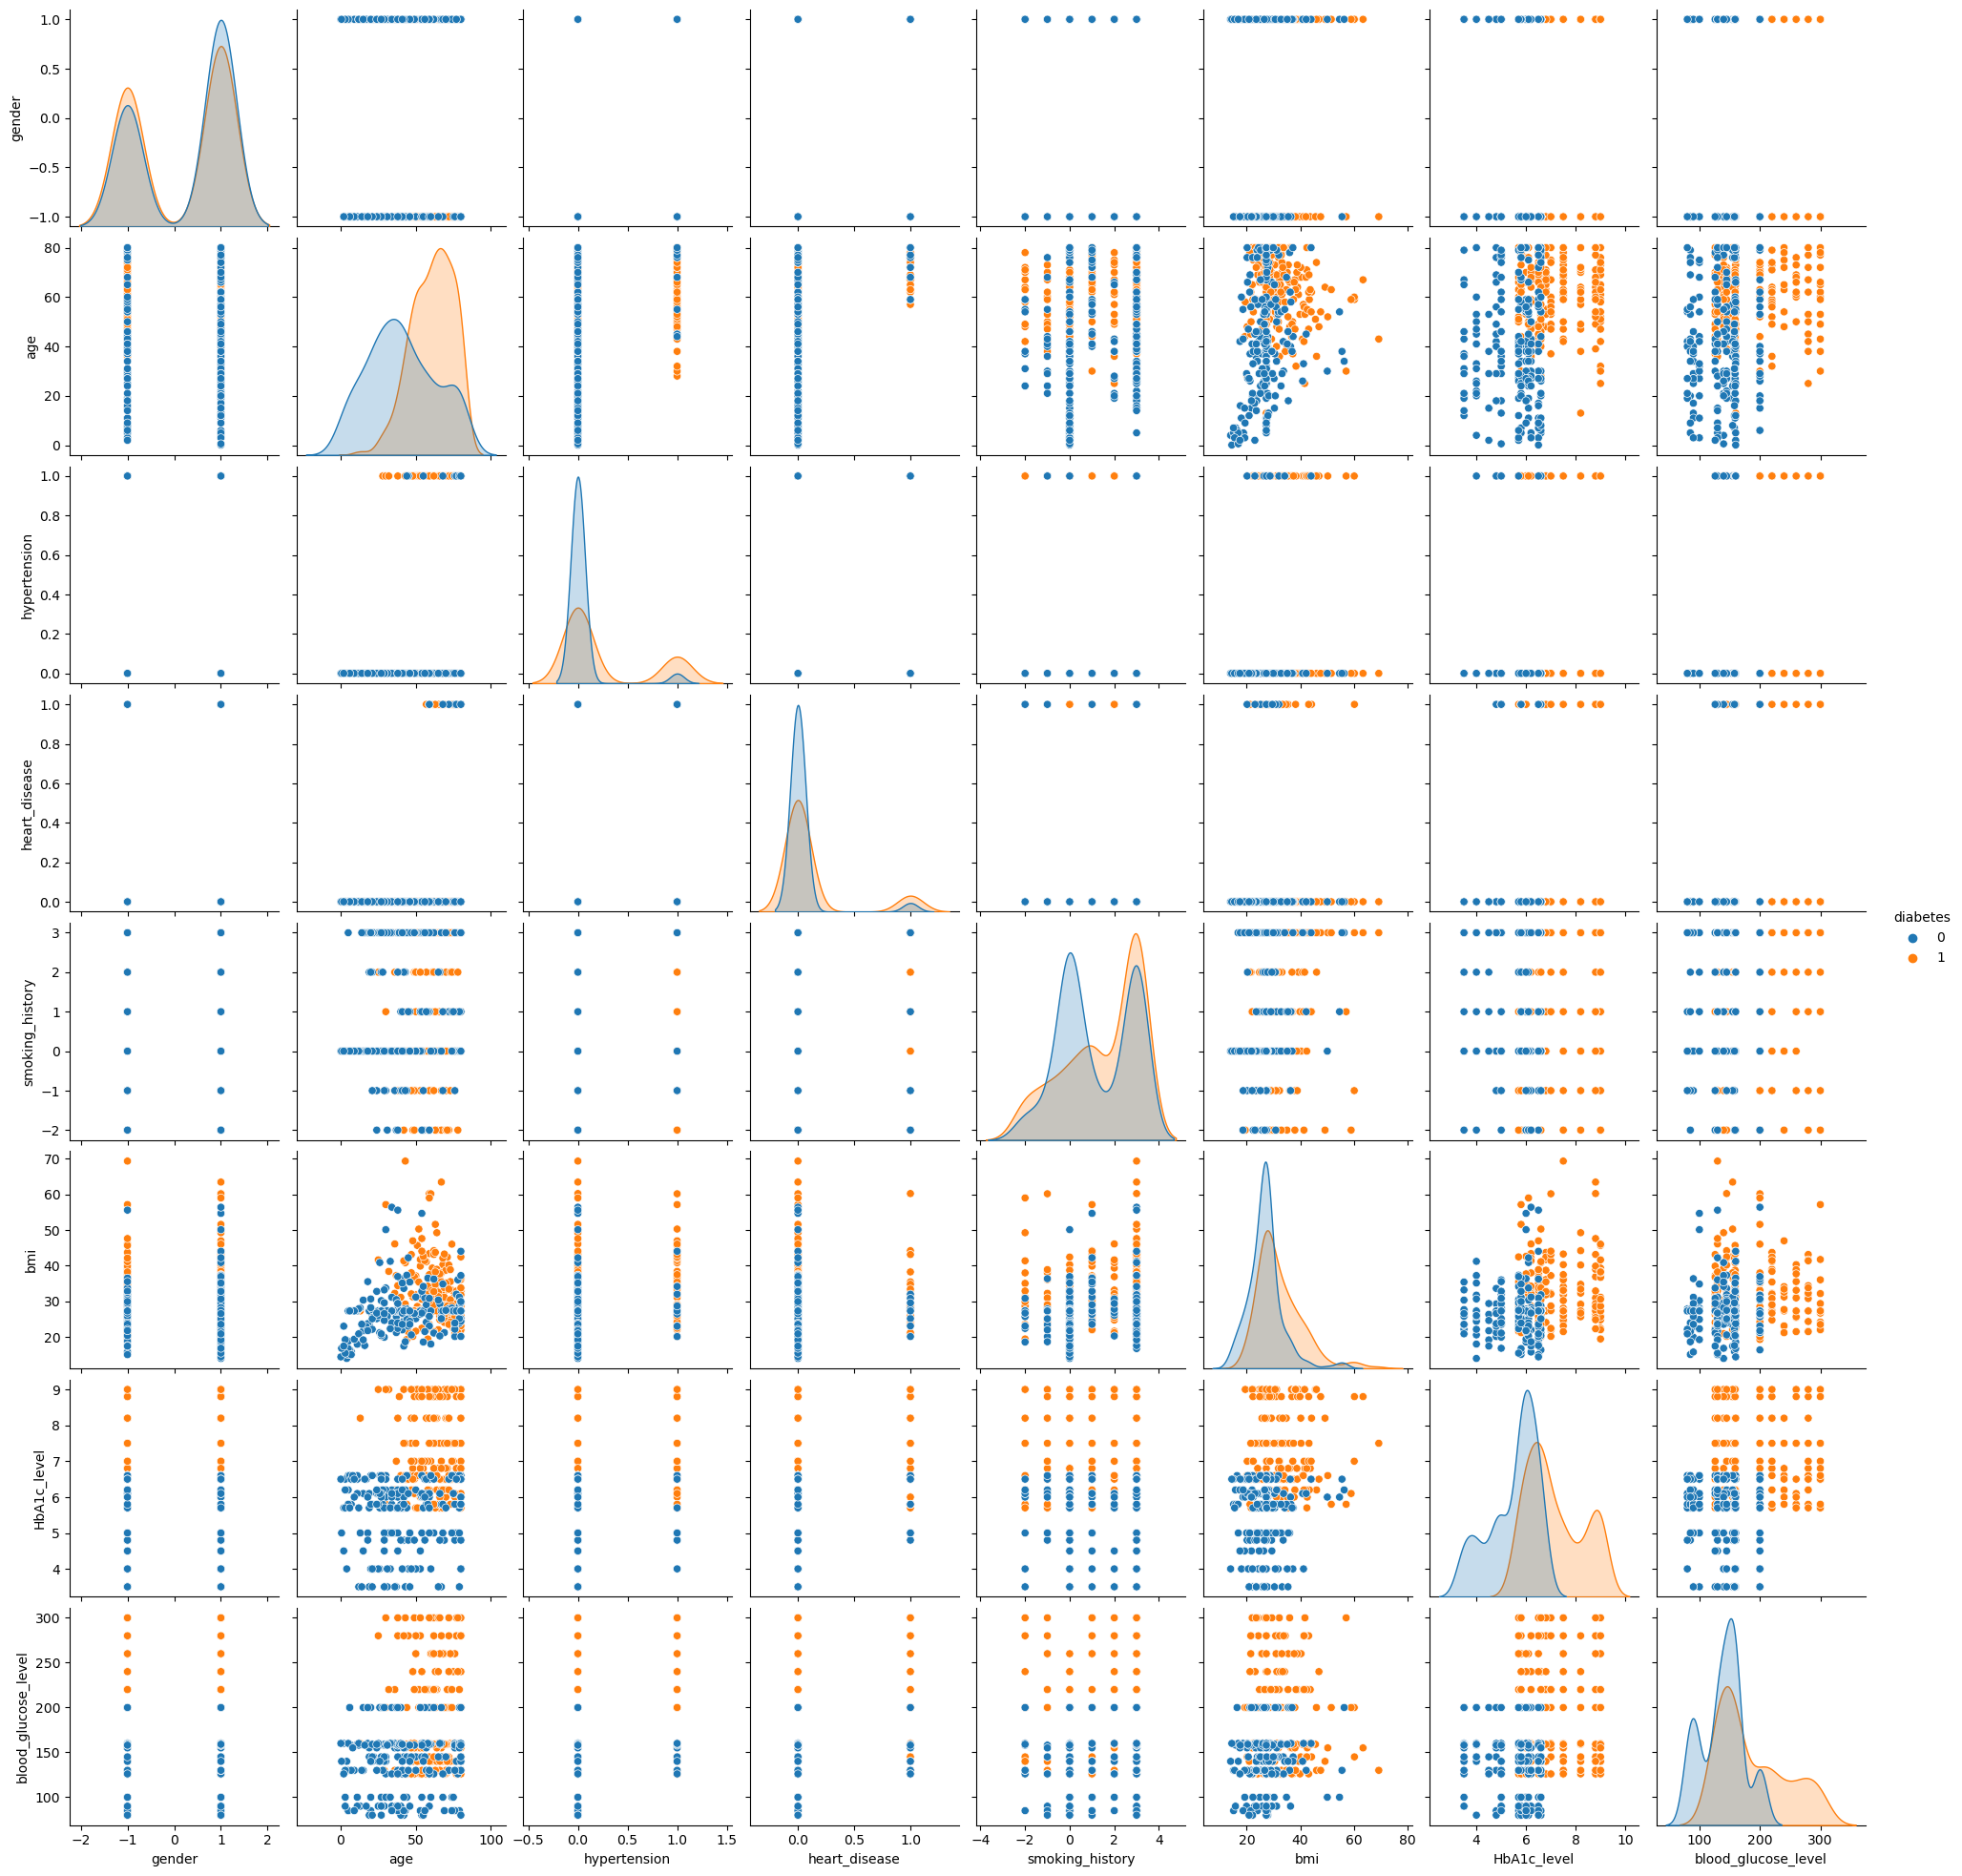

In [19]:
n = 200
X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]][:]

diabetic_df = df[:][y==1]
diabetic_df = diabetic_df[0:n]
nondiabetic_df = df[:][y==0]
nondiabetic_df = nondiabetic_df[0:n]

sns.pairplot(diabetic_df.append(nondiabetic_df), hue=df.columns[-1])  
plt.savefig('Scatter.png', dpi = 300)
plt.show()

At the following section, we split our dataset to Train and Test datasets using ratio of 0.7 to 0.3 respectively. 

In [20]:
X = df.drop(columns=df.columns[-1])
y = df[df.columns[-1]][:]
[X_train, X_test, y_train, y_test] = train_test_split(X,y,stratify=y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

(70000, 8)
(30000,)


In the following section, we assume that the distribution fuction of features in each class in Normal. Then using Maximum Likelihood method, we extract each class conditional probability's parameter. At the end of the section, by using NaiveBayesClassifier and ClassificationAccuracy which were introduced in the begining, we evalute the accuracy of train and test dataset for all datas and the accuracy only for diabetic samples.

In [21]:
X_train_diabetic=X_train[:][y_train==1]
X_train_nondiabetic=X_train[:][y_train==0]
X_test_diabetic=X_test[:][y_test==1]
X_test_nondiabetic=X_test[:][y_test==0]

mus=np.transpose([X_train_nondiabetic.mean(), X_train_diabetic.mean()])
sigmas=np.transpose([X_train_nondiabetic.var(), X_train_diabetic.var()])
class_names=['non-diabetic', 'diabetic']
priors=[np.sum(y_train==0)/len(y_train), np.sum(y_train==1)/len(y_train)]

diabetic_classifier=NaiveBayesClassifier(mus,sigmas,class_names,priors)

test_data_cr=diabetic_classifier.classificationRate(np.array(X_test.loc[:]),y_test[:])
train_data_cr=diabetic_classifier.classificationRate(np.array(X_train.loc[:]),y_train[:])
print('test data evaluation: ',test_data_cr)
print('train data evaluation: ',train_data_cr)

test_data_cr=diabetic_classifier.classificationRate(np.array(X_test.loc[y_test==1]),y_test[y_test==1])
train_data_cr=diabetic_classifier.classificationRate(np.array(X_train.loc[y_train==1]),y_train[y_train==1])
print('test data evaluation just for diabetics: ',test_data_cr)
print('train data evaluation just for diabetics: ',train_data_cr)

test data evaluation:  0.9003333333333333
train data evaluation:  0.9041428571428571
test data evaluation just for diabetics:  0.6262745098039215
train data evaluation just for diabetics:  0.6546218487394958


### K-Fold 
In the following section, first, we import necessary libraries for K-Fold algorithm. then we assume K=4 which means we need to split whole dataset into 4 equal parts. After that, by considering each of these 4 parts as test data and the rest as training data, the separation accuracy is calculated. Finally, the average of the 4 calculated accuracies is computed and reported.

In [22]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
kf.get_n_splits(df)

cv=[]
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
  train_data=df.loc[train_index]
  test_data=df.loc[test_index]
  train_target=df[df.columns[-1]][train_index]
  test_target=df[df.columns[-1]][test_index]

  kf_mus=np.transpose([X_train_nondiabetic.mean(), X_train_diabetic.mean()])
  kf_sigmas=np.transpose([X_train_nondiabetic.var(), X_train_diabetic.var()])
  kf_priors=[np.sum(train_target==0)/len(train_target), np.sum(train_target==1)/len(train_target)]

  kf_diabetic_classifier=NaiveBayesClassifier(kf_mus,kf_sigmas,class_names,kf_priors)
  cv.append(kf_diabetic_classifier.classificationRate(np.array(test_data.loc[:]),test_target[:]))

print(cv)
print(f'\n4-fold cross validation result: {np.mean(cv)}')

[0.9021714285714286, 0.9012, 0.9049714285714285, 0.9030285714285714]

4-fold cross validation result: 0.9028428571428572


In the following section, we are going to calculate the Confusion Matrix of Train dataset.

In [23]:
train_conf_matrix=np.zeros((4,2))

X_train_diabetic=X_train[:][y_train==1]
X_train_nondiabetic=X_train[:][y_train==0]
X_test_diabetic=X_test[:][y_test==1]
X_test_nondiabetic=X_test[:][y_test==0]

train_conf_matrix[0,0]=diabetic_classifier.classificationRate(np.array(X_train_nondiabetic[:]),y_train[y_train==0])* len(y_train[y_train==0])
train_conf_matrix[0,1]=diabetic_classifier.classificationRate(np.array(X_train_diabetic[:]),y_train[y_train==1])* len(y_train[y_train==1])

train_conf_matrix[1,0]=len(y_train[y_train==1])-train_conf_matrix[1,0]
train_conf_matrix[1,1]=len(y_train[y_train==0])-train_conf_matrix[0,0]

train_conf_matrix[2,0]=train_conf_matrix[1,1]
train_conf_matrix[2,1]=train_conf_matrix[1,0]

train_conf_matrix[3,0]=train_conf_matrix[0,1]
train_conf_matrix[3,1]=train_conf_matrix[0,0]

train_conf_matrix=pd.DataFrame(data=train_conf_matrix,index=['TP','FP','FN','TN'],columns=['train_non-diabetics','train_diabetics'])
train_conf_matrix

,train_non-diabetics,train_diabetics
TP,59395.0,3895.0
FP,5950.0,4655.0
FN,4655.0,5950.0
TN,3895.0,59395.0


Like the previous section, we calculate the Confusion Matrix for Test dataset.

In [24]:
test_conf_matrix=np.zeros((4,2))

test_conf_matrix[0,0]=diabetic_classifier.classificationRate(np.array(X_test_nondiabetic[:]),y_test[y_test==0])* len(y_test[y_test==0])
test_conf_matrix[0,1]=diabetic_classifier.classificationRate(np.array(X_test_diabetic[:]),y_test[y_test==1])* len(y_test[y_test==1])

test_conf_matrix[1,0]=len(y_test[y_test==1])-test_conf_matrix[1,0]
test_conf_matrix[1,1]=len(y_test[y_test==0])-test_conf_matrix[0,0]

test_conf_matrix[2,0]=test_conf_matrix[1,1]
test_conf_matrix[2,1]=test_conf_matrix[1,0]

test_conf_matrix[3,0]=test_conf_matrix[0,1]
test_conf_matrix[3,1]=test_conf_matrix[0,0]

test_conf_matrix=pd.DataFrame(data=test_conf_matrix,index=['TP','FP','FN','TN'],columns=['test_non-diabetics','test_diabetics'])
test_conf_matrix

,test_non-diabetics,test_diabetics
TP,25413.0,1597.0
FP,2550.0,2037.0
FN,2037.0,2550.0
TN,1597.0,25413.0


### Extra Point - Efficiency Improvement
In the following section, we are going to evaluate the effect of Removing unuseful features on Total Efficiency. As we can see in attached file "Scatter.png", the features: 

gender, bmi, smoking_history, heart_disease

seem to be unuseful; because their distributio is equal for each class. By Ignoring these features, we can see The classification accuracy has not changed significantly.

In [25]:
X=df.drop(columns=[df.columns[-1],'gender','heart_disease','bmi','smoking_history'])
y=df[df.columns[-1]][:]
[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,test_size=0.3)
print(X_train.shape)
print(y_test.shape)

X_train_diabetic=X_train[:][y_train==1]
X_train_nondiabetic=X_train[:][y_train==0]
X_test_diabetic=X_test[:][y_test==1]
X_test_nondiabetic=X_test[:][y_test==0]

mus=np.transpose([X_train_nondiabetic.mean(), X_train_diabetic.mean()])
sigmas=np.transpose([X_train_nondiabetic.var(), X_train_diabetic.var()])
class_names=['non-diabetic', 'diabetic']
priors=[np.sum(y_train==0)/len(y_train), np.sum(y_train==1)/len(y_train)]

diabetic_classifier=NaiveBayesClassifier(mus,sigmas,class_names,priors)

test_data_cr=diabetic_classifier.classificationRate(np.array(X_test.loc[:]),y_test[:])
train_data_cr=diabetic_classifier.classificationRate(np.array(X_train.loc[:]),y_train[:])
print('test data evaluation: ',test_data_cr)
print('train data evaluation: ',train_data_cr)

test_data_cr=diabetic_classifier.classificationRate(np.array(X_test.loc[y_test==1]),y_test[y_test==1])
train_data_cr=diabetic_classifier.classificationRate(np.array(X_train.loc[y_train==1]),y_train[y_train==1])
print('test data evaluation just for diabetics: ',test_data_cr)
print('train data evaluation just for diabetics: ',train_data_cr)

(70000, 4)
(30000,)
test data evaluation:  0.9182
train data evaluation:  0.9171857142857143
test data evaluation just for diabetics:  0.6278431372549019
train data evaluation just for diabetics:  0.621344537815126
